# Problem

Price elasticity in ticket prices fluctuate and optimal pricing and sell-thru rate is needed to optimize sales. There are various reasons why prices fluctuate. Since it is a landscape driven market (rankings, prestige, popularity, etc) this is a concrete method to see how sensitive the demand for a ticket is to a price change.

# Hypothesis

The optimal sell-thru rate is between 60% - 80% to optimize ticket sales.

# Datasets 

Features include:

1) DAYS-TO-EVENT: The transaction date - the event date.

2) GENRE: The naming convention used to term artists, teams, and events.

3) SEASON: The college football season. (August - January)

4) ORDERS: The transaction initiated by a buyer.

5) GROSS TICKET SALES: The overall value of the order purchased.

6) TICKETS SOLD: The number of tickets sold from a buyer's order.

7) ATP: The amount paid for a single ticket.

8) STR: The number of tickets sold/tickets listed.

# Assumptions

The data from my sample are representative of all schools.

Segmented schools by size of school and strength of program into 3 categories (Small, Medium, Big).

# Concerns

Unsure about how I will utilize all of my features into my model.

In [275]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;
from sklearn import feature_selection, linear_model

In [192]:
pwd

u'/Users/raymonddelacruz/DS-SF-36/final-project/2'

In [193]:
df = pd.read_csv('CF_Data.csv')

In [194]:
df.dtypes

SEASON             object
GENRE_DESCR        object
EVENT_DESCR        object
Ticket Sales       object
Tickets Sold       object
Tickets Listed      int64
Sell Thru Rate    float64
dtype: object

In [195]:
df['Ticket Sales'] = pd.to_numeric(df['Ticket Sales'], errors='ignore')

In [196]:
df.dtypes

SEASON             object
GENRE_DESCR        object
EVENT_DESCR        object
Ticket Sales       object
Tickets Sold       object
Tickets Listed      int64
Sell Thru Rate    float64
dtype: object

In [197]:
df['Ticket Sales'] = df['Ticket Sales'].replace(',', '')


In [198]:
df['Ticket Sales'] = df['Ticket Sales'].str.replace(",", "").astype(float)

In [199]:
df

,SEASON,GENRE_DESCR,EVENT_DESCR,Ticket Sales,Tickets Sold,Tickets Listed,Sell Thru Rate
0,"2,015",Air Force Falcons Football Tickets,Utah State Aggies at Air Force Falcons Footbal...,122.0,10,52,0.192308
1,"2,015",Georgia Tech Yellow Jackets Football Tickets,Florida State Seminoles at Georgia Tech Yellow...,28552.0,203,207,0.980676
2,"2,015",Oregon State Beavers Football Tickets,Washington Huskies at Oregon State Beavers Foo...,9158.0,159,284,0.559859
3,"2,015",Oregon State Beavers Football Tickets,Stanford Cardinal at Oregon State Beavers Foot...,6958.0,131,258,0.507752
4,"2,015",Oregon State Beavers Football Tickets,San Jose State Spartans at Oregon State Beaver...,10854.0,276,300,0.920000
...,...,...,...,...,...,...,...
87,"2,015",Iowa Hawkeyes Football Tickets,Purdue Boilermakers at Iowa Hawkeyes Football ...,8160.0,187,238,0.785714
88,"2,015",Iowa Hawkeyes Football Tickets,Minnesota Golden Gophers at Iowa Hawkeyes Foot...,3085.0,18,44,0.409091
89,"2,014",Michigan Wolverines Football Tickets,Appalachian State Mountaineers at Michigan Wol...,2880.0,72,74,0.972973
90,"2,013",Michigan Wolverines Football Tickets,Central Michigan Chippewas at Michigan Wolveri...,600.0,8,8,1.000000


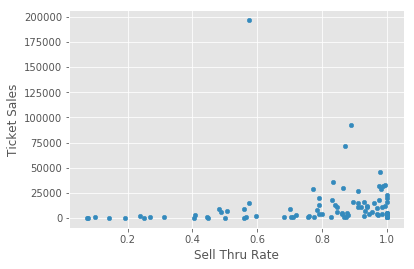

In [200]:
#All The Data

df.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [282]:
df['Tickets Sold'] = pd.to_numeric(df['Tickets Sold'], errors='ignore')

In [283]:
df['Tickets Sold'] = df['Tickets Sold'].replace(',', '')

In [284]:
df['Tickets Sold'] = df['Tickets Sold'].str.replace(",", "").astype(float)

In [201]:
#2013 

df_2013 = pd.read_csv('2013_season.csv')

In [202]:
df_2013['Ticket Sales'] = pd.to_numeric(df_2013['Ticket Sales'], errors='ignore')

In [203]:
df_2013['Ticket Sales'] = df_2013['Ticket Sales'].replace(',', '')


In [204]:
df_2013['Ticket Sales'] = df_2013['Ticket Sales'].str.replace(",", "").astype(float)

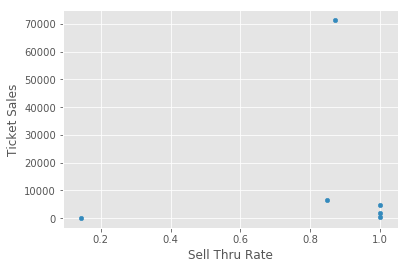

In [205]:
#2013

df_2013.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [207]:
#2014

df_2014 = pd.read_csv('2014_season.csv')

In [208]:
df_2014['Ticket Sales'] = pd.to_numeric(df_2014['Ticket Sales'], errors='ignore')

In [209]:
df_2014['Ticket Sales'] = df_2014['Ticket Sales'].replace(',', '')

In [210]:
df_2014['Ticket Sales'] = df_2014['Ticket Sales'].str.replace(",", "").astype(float)

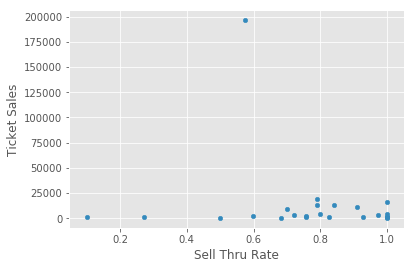

In [211]:
#2014

df_2014.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [212]:
#2015 

df_2015 = pd.read_csv('2015_season_data.csv')

In [213]:
df_2015['Ticket Sales'] = pd.to_numeric(df_2015['Ticket Sales'], errors='ignore')

In [214]:
df_2015['Ticket Sales'] = df_2015['Ticket Sales'].replace(',', '')

In [215]:
df_2015['Ticket Sales'] = df_2015['Ticket Sales'].str.replace(",", "").astype(float)

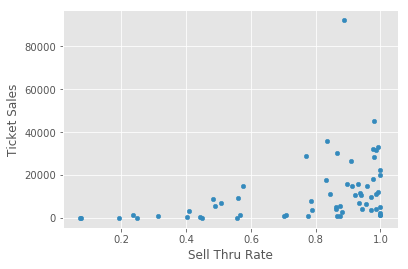

In [216]:
#2015

df_2015.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [217]:
#All Airforce

df_AF_ALL = pd.read_csv('All_Airforce_Data.csv')

In [218]:
df_AF_ALL['Ticket Sales'] = pd.to_numeric(df_AF_ALL['Ticket Sales'], errors='ignore')

In [219]:
df_AF_ALL['Ticket Sales'] = df_AF_ALL['Ticket Sales'].replace(',', '')

In [220]:
df_AF_ALL['Ticket Sales'] = df_AF_ALL['Ticket Sales'].str.replace(",", "").astype(float)

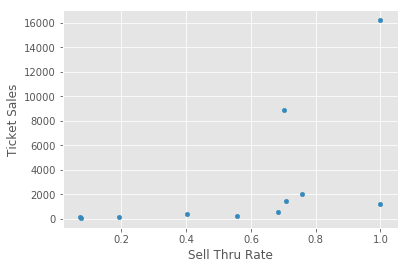

In [221]:
#Air Force

df_AF_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [222]:
#All CAL

df_CAL_ALL = pd.read_csv('All_CAL_Data.csv')

In [223]:
df_CAL_ALL['Ticket Sales'] = pd.to_numeric(df_CAL_ALL['Ticket Sales'], errors='ignore')

In [224]:
df_CAL_ALL['Ticket Sales'] = df_CAL_ALL['Ticket Sales'].replace(',', '')

In [225]:
df_CAL_ALL['Ticket Sales'] = df_CAL_ALL['Ticket Sales'].str.replace(",", "").astype(float)

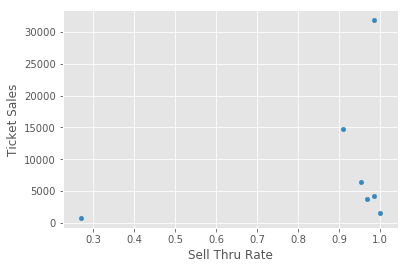

In [226]:
#CAL

df_CAL_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [242]:
#All LSU

df_LSU_ALL = pd.read_csv('All_LSU_Data.csv')

In [243]:
df_LSU_ALL['Ticket Sales'] = pd.to_numeric(df_LSU_ALL['Ticket Sales'], errors='ignore')

In [244]:
df_LSU_ALL['Ticket Sales'] = df_LSU_ALL['Ticket Sales'].replace(',', '')

In [245]:
df_LSU_ALL['Ticket Sales'] = df_LSU_ALL['Ticket Sales'].str.replace(",", "").astype(float)

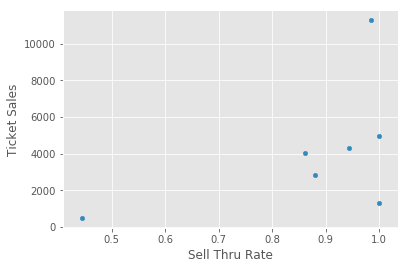

In [246]:
#LSU

df_LSU_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [247]:
#All Michigan

df_M_ALL = pd.read_csv('All_M_Data.csv')

In [248]:
df_M_ALL['Ticket Sales'] = pd.to_numeric(df_M_ALL['Ticket Sales'], errors='ignore')

In [249]:
df_M_ALL['Ticket Sales'] = df_M_ALL['Ticket Sales'].replace(',', '')

In [250]:
df_M_ALL['Ticket Sales'] = df_M_ALL['Ticket Sales'].str.replace(",", "").astype(float)

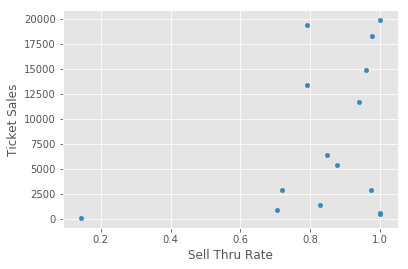

In [251]:
#Michigan

df_M_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [254]:
#All MSU

df_MSU_ALL = pd.read_csv('All_MS_Data.csv')

In [255]:
df_MSU_ALL['Ticket Sales'] = pd.to_numeric(df_MSU_ALL['Ticket Sales'], errors='ignore')

In [256]:
df_MSU_ALL['Ticket Sales'] = df_MSU_ALL['Ticket Sales'].replace(',', '')

In [257]:
df_MSU_ALL['Ticket Sales'] = df_MSU_ALL['Ticket Sales'].str.replace(",", "").astype(float)

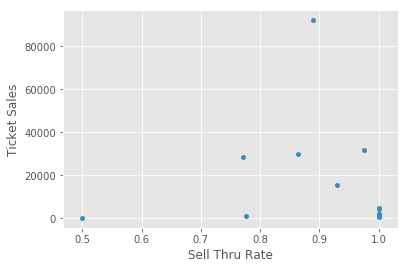

In [258]:
#MSU

df_MSU_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [259]:
#Oregon

df_O_ALL = pd.read_csv('All_Oregon_Data.csv')

In [260]:
df_O_ALL['Ticket Sales'] = pd.to_numeric(df_O_ALL['Ticket Sales'], errors='ignore')

In [261]:
df_O_ALL['Ticket Sales'] = df_O_ALL['Ticket Sales'].replace(',', '')

In [262]:
df_O_ALL['Ticket Sales'] = df_O_ALL['Ticket Sales'].str.replace(",", "").astype(float)

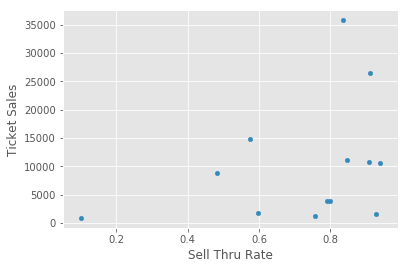

In [263]:
#Oregon

df_O_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

# Overview

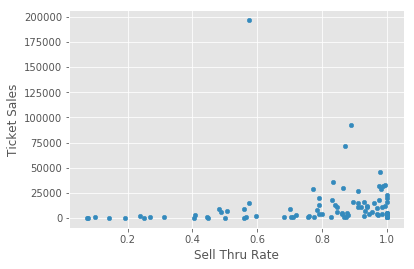

In [264]:
#All The Data

df.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

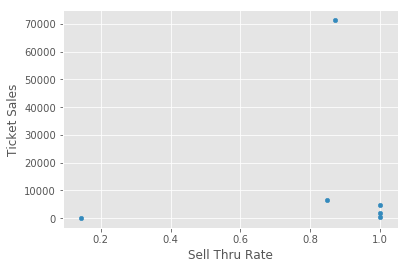

In [265]:
#2013

df_2013.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

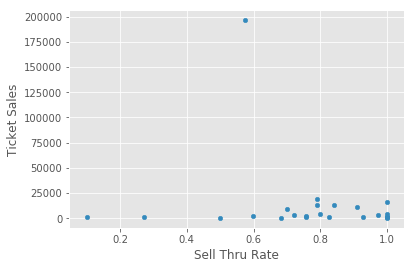

In [266]:
#2014

df_2014.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

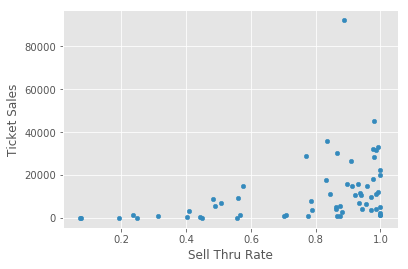

In [267]:
#2015

df_2015.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

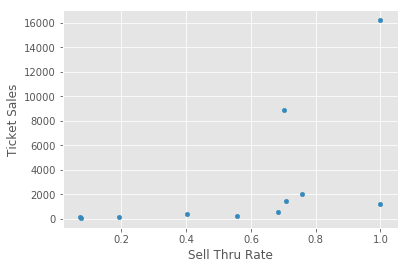

In [268]:
#Air Force

df_AF_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

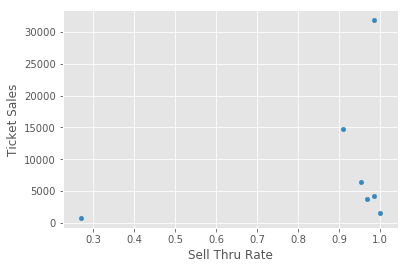

In [269]:
#CAL

df_CAL_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

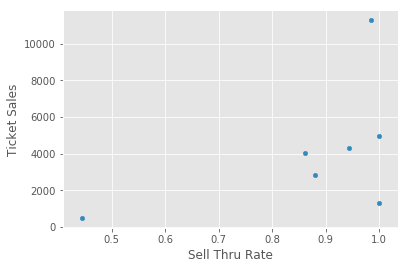

In [270]:
#LSU

df_LSU_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

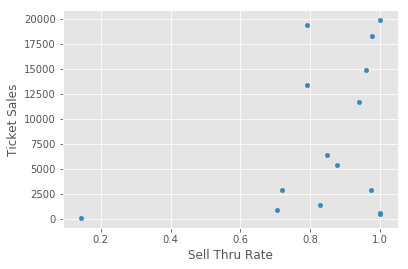

In [271]:
#Michigan

df_M_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

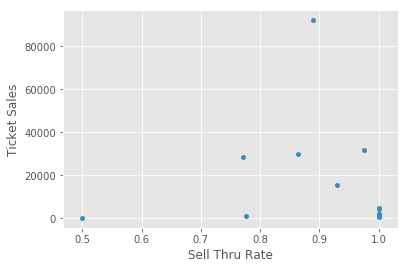

In [272]:
#MSU

df_MSU_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

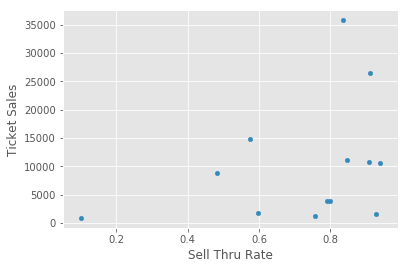

In [273]:
#Oregon

df_O_ALL.plot(kind = 'scatter', x = 'Sell Thru Rate', y = 'Ticket Sales')

In [296]:
X = df[ ['Tickets Listed','Tickets Sold', 'Ticket Sales'] ]
y = df['Sell Thru Rate']

model = linear_model.LinearRegression()
model.fit(X,y)

print model.intercept_
print model.coef_

0.725324300024
[ -1.06155146e-03   1.35882792e-03   3.82542303e-06]


In [297]:
model.score(X, y)

0.26986783241696743

In [285]:
df.dtypes

SEASON             object
GENRE_DESCR        object
EVENT_DESCR        object
Ticket Sales      float64
Tickets Sold      float64
Tickets Listed      int64
Sell Thru Rate    float64
dtype: object